In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import SciPy
#import splitfolders

In [2]:
#splitfolders.ratio("C:\\Users\\Dayanand\\Corn\\dataset\\d", output="output", seed=1337, ratio=(.7, 0.15,0.15)) 
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'F:\\dataset\\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 9179 images belonging to 4 classes.


In [4]:
train_generator.class_indices

{'Black Rot': 0, 'ESCA': 1, 'Healthy': 2, 'Leaf Blight': 3}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Black Rot', 'ESCA', 'Healthy', 'Leaf Blight']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'F:\\dataset\\val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1966 images belonging to 4 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'F:\\dataset\\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 1971 images belonging to 4 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.69821966 0.6903765  0.7021412 ]
  [0.7026738  0.69483066 0.70659536]
  [0.7214639  0.7136208  0.7253855 ]
  ...
  [0.7298192  0.72197604 0.7258976 ]
  [0.69014996 0.6823068  0.6862284 ]
  [0.65048075 0.6426376  0.6465592 ]]

 [[0.6994912  0.69164807 0.7034128 ]
  [0.70156    0.6937169  0.7054816 ]
  [0.71937543 0.7115323  0.723297  ]
  ...
  [0.7336641  0.72582096 0.7297425 ]
  [0.77659386 0.7687507  0.7726723 ]
  [0.8195235  0.8116804  0.81560194]]

 [[0.70166487 0.6938217  0.70558643]
  [0.7010166  0.6931734  0.7049382 ]
  [0.71665835 0.7088152  0.7205799 ]
  ...
  [0.7644302  0.7565871  0.76050866]
  [0.72639126 0.7185481  0.7224697 ]
  [0.68835235 0.6805092  0.6844308 ]]

 ...

 [[0.5493106  0.51009494 0.5140165 ]
  [0.5557057  0.51649004 0.5204116 ]
  [0.5627701  0.52355444 0.527476  ]
  ...
  [0.62886053 0.5818017  0.5818017 ]
  [0.61088914 0.5638303  0.5638303 ]
  [0.59586227 0.54880345 0.54880345]]

 [[0.5991299  0.55991423 0.5638358 ]
  [0.60333544 0.56411976 0.5680413 ]


In [26]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 64)       

In [28]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
9173/32

286.65625

In [30]:
1966/32

61.4375

In [33]:
history = model.fit(
    train_generator,
    steps_per_epoch=286,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=61,
    verbose=1,
    epochs=50,
)

Epoch 1/50
286/286 [==============================] - 653s 2s/step - loss: 0.6525 - accuracy: 0.7018 - val_loss: 0.2596 - val_accuracy: 0.8970
Epoch 2/50
286/286 [==============================] - 574s 2s/step - loss: 0.2109 - accuracy: 0.9229 - val_loss: 0.1305 - val_accuracy: 0.9544
Epoch 3/50
286/286 [==============================] - 606s 2s/step - loss: 0.0980 - accuracy: 0.9668 - val_loss: 0.0693 - val_accuracy: 0.9785
Epoch 4/50
286/286 [==============================] - 565s 2s/step - loss: 0.0660 - accuracy: 0.9774 - val_loss: 0.0676 - val_accuracy: 0.9749
Epoch 5/50
286/286 [==============================] - 557s 2s/step - loss: 0.0560 - accuracy: 0.9798 - val_loss: 0.1353 - val_accuracy: 0.9524
Epoch 6/50
286/286 [==============================] - 553s 2s/step - loss: 0.0342 - accuracy: 0.9873 - val_loss: 0.0519 - val_accuracy: 0.9810
Epoch 7/50
286/286 [==============================] - 559s 2s/step - loss: 0.0507 - accuracy: 0.9815 - val_loss: 0.0467 - val_accuracy: 0.9810

In [34]:
scores = model.evaluate(test_generator)

62/62 [==============================] - 79s 1s/step - loss: 0.0114 - accuracy: 0.9975


In [35]:
scores

[0.01137567963451147, 0.9974632263183594]

In [36]:
history

In [37]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 286}

In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
len(history.history['loss'])

50

In [40]:
history.history['loss'][:5]

[0.6524984836578369,
 0.2108936756849289,
 0.09799511730670929,
 0.06598599255084991,
 0.05598677322268486]

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [42]:
val_acc

[0.8970286846160889,
 0.9544057250022888,
 0.9784836173057556,
 0.974897563457489,
 0.9523565769195557,
 0.9810450673103333,
 0.9810450673103333,
 0.9928278923034668,
 0.9902663826942444,
 0.993852436542511,
 0.9923155903816223,
 0.9964139461517334,
 0.9923155903816223,
 0.9907786846160889,
 0.9953893423080444,
 0.9267417788505554,
 0.9974385499954224,
 0.9953893423080444,
 0.998975396156311,
 0.9979507923126221,
 0.9979507923126221,
 0.9984630942344666,
 0.9918032884597778,
 0.993852436542511,
 0.9969262480735779,
 0.9918032884597778,
 0.9948770403862,
 0.9979507923126221,
 0.9959016442298889,
 0.9979507923126221,
 0.9820696711540222,
 0.9918032884597778,
 0.9933401346206665,
 0.9974385499954224,
 0.9953893423080444,
 0.9984630942344666,
 0.9964139461517334,
 0.9974385499954224,
 0.9979507923126221,
 0.9974385499954224,
 0.9969262480735779,
 0.9933401346206665,
 0.9974385499954224,
 0.9969262480735779,
 0.9969262480735779,
 0.9979507923126221,
 0.998975396156311,
 0.9933401346206665,


In [43]:
acc

[0.7017601132392883,
 0.9229255318641663,
 0.9667650461196899,
 0.9773696064949036,
 0.9797747731208801,
 0.987318217754364,
 0.9815239906311035,
 0.9925658702850342,
 0.9936591386795044,
 0.9927845001220703,
 0.9927845001220703,
 0.9926751852035522,
 0.9944244027137756,
 0.9934404492378235,
 0.9927845001220703,
 0.9966109395027161,
 0.9902700185775757,
 0.9967202544212341,
 0.9926751852035522,
 0.9966109395027161,
 0.9968295693397522,
 0.995736300945282,
 0.9971575140953064,
 0.9918006062507629,
 0.999562680721283,
 0.9935498237609863,
 0.9986881017684937,
 0.9965015649795532,
 0.9971575140953064,
 0.9963922500610352,
 0.9984694719314575,
 0.996173620223999,
 0.9959549307823181,
 0.9990160465240479,
 0.9984694719314575,
 0.9974855184555054,
 0.9946430325508118,
 0.9979228377342224,
 0.9981414675712585,
 0.9982507824897766,
 0.9981414675712585,
 0.9967202544212341,
 0.9955176711082458,
 0.9984694719314575,
 0.9977041482925415,
 0.9993440508842468,
 1.0,
 0.9939870834350586,
 0.99792283

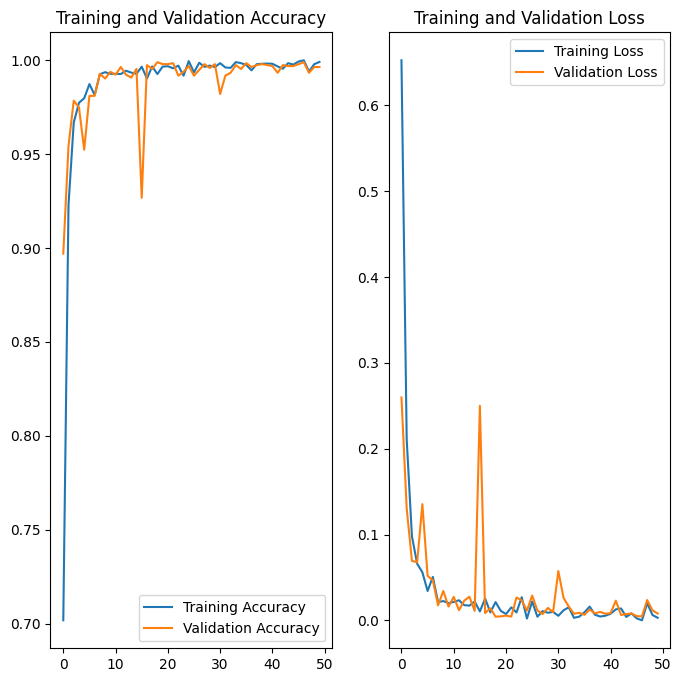

In [44]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: ESCA
predicted label: ESCA


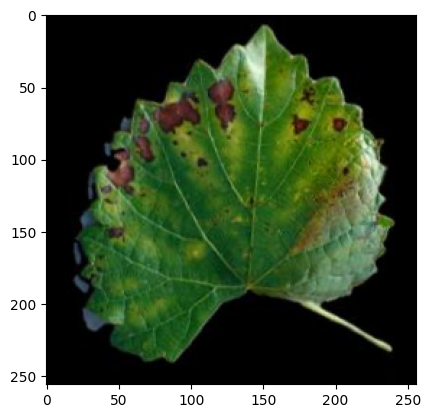

In [47]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [49]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [50]:
model.save("../potatoes.h5")